In [1]:
import numpy as np                  #Import numpy so that we can actually do maths ...
import matplotlib.pyplot as plt     #and make pretty plots.

InitVal = np.array([0,10])       #Specify the 'true' initial values of the quantity we are estimating. 

Dt = 2

A = np.eye(2)
A[0,1] = Dt

Est0 = np.array([-15,0])           #Specify an initial estimate ...
EstErr0 = np.diag([15,10])           # and an estimated variance of our initial estimate.

MeasErr = np.diag([10,5])            #Specify an estimated error in the measurements.
                                        #This will be used as the variance of the measurements' distribution. 

N = 10                             #Specify a number of iterations to perform.

In [2]:
Estimates = np.zeros((2,N+1))         #Initialise arrays to record the estimated and 'measured' values.
Measurements = np.zeros((2,N))

i = 0                               #Start an iteration counter.
Estimates.T[0] = Est0               #Write the initial estimate into the record.

TrueVal = InitVal

X = Est0.T                          #X -- State matrix
P = EstErr0                         #P -- State covariance matrix
R = MeasErr                         #R -- Measurement covariance matrix

while i < N:
    Xp = A@X                          #Xp -- Predicted state
    Pp = A@P@A.T                          #Pp -- Predicted state covariance
    
    Y = np.random.multivariate_normal(A@TrueVal,R)
    Measurements.T[i] = Y           #Y -- 'Measured' value
    
    K = Pp@np.linalg.inv(Pp + R)    #K -- Kalman gain
    
    X = Xp + K@(Y - Xp)             #Update X and P
    P = (np.eye(2) - K)@Pp
    i = i+1                         #Increment the iteration counter,
    Estimates.T[i] = X              # and write the new estimated values to the record.
    TrueVal = A@TrueVal

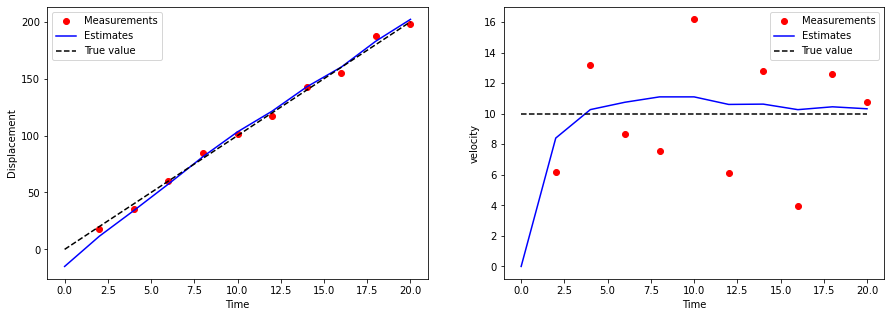

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(np.array(list(range(1,N+1)))*Dt, Measurements[0],'ro',label='Measurements')
ax1.plot(np.array(list(range(0,N+1)))*Dt, Estimates[0],'b',label='Estimates')
ax1.plot(np.array(list(range(0,N+1)))*Dt, InitVal[0]*np.ones(N+1) + np.array(list(range(0,N+1)))*InitVal[1]*Dt,'k--',label='True value')
ax1.set_xlabel('Time')
ax1.set_ylabel('Displacement')
ax1.legend()
ax2.plot(np.array(list(range(1,N+1)))*Dt, Measurements[1],'ro',label='Measurements')
ax2.plot(np.array(list(range(0,N+1)))*Dt, Estimates[1],'b',label='Estimates')
ax2.plot(np.array(list(range(0,N+1)))*Dt, TrueVal[1]*np.ones(N+1),'k--',label='True value')
ax2.set_xlabel('Time')
ax2.set_ylabel('velocity')
ax2.legend()